In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
d=pd.read_csv('bikesharing.csv')
df=pd.DataFrame(d)
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [3]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

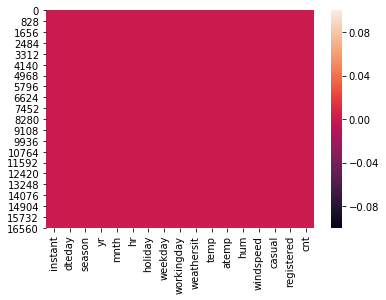

In [4]:
sns.heatmap(df.isnull())

In [5]:
dfcor=df.corr()
dfcor

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


In [6]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


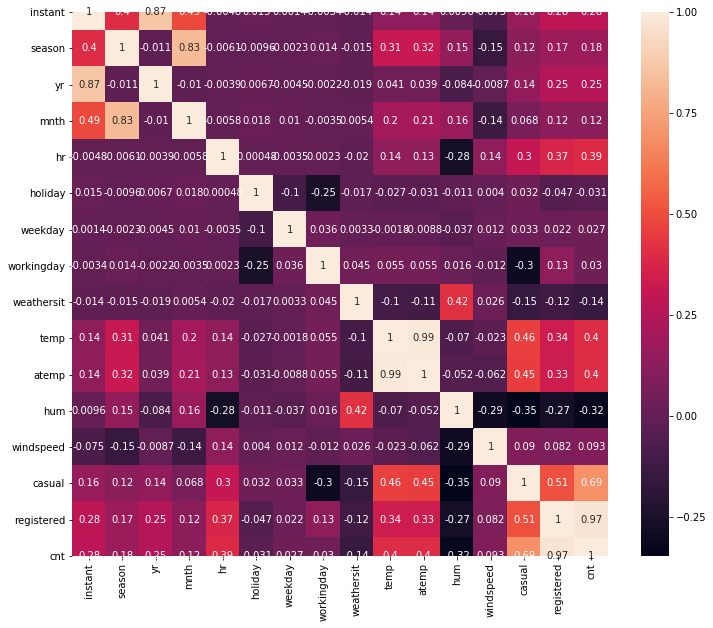

In [7]:
plt.figure(figsize=(12,10))
sns.heatmap(dfcor,annot=True)

In [8]:
df.skew()

instant       0.000000
season       -0.005416
yr           -0.010243
mnth         -0.009253
hr           -0.010680
holiday       5.638538
weekday      -0.002998
workingday   -0.785258
weathersit    1.228047
temp         -0.006021
atemp        -0.090429
hum          -0.111287
windspeed     0.574905
casual        2.499237
registered    1.557904
cnt           1.277412
dtype: float64

In [9]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [10]:
df.drop('dteday',axis=1,inplace=True)
df.columns

Index(['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [11]:
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [12]:
df.skew()

instant       0.000000
season       -0.005416
yr           -0.010243
mnth         -0.009253
hr           -0.010680
holiday       5.638538
weekday      -0.002998
workingday   -0.785258
weathersit    0.996837
temp         -0.006021
atemp        -0.090429
hum          -0.111287
windspeed     0.263926
casual       -0.230087
registered   -0.819644
cnt          -0.818180
dtype: float64

In [13]:
df['holiday']=np.log(df['holiday'])


In [14]:
df.skew()

instant       0.000000
season       -0.005416
yr           -0.010243
mnth         -0.009253
hr           -0.010680
holiday            NaN
weekday      -0.002998
workingday   -0.785258
weathersit    0.996837
temp         -0.006021
atemp        -0.090429
hum          -0.111287
windspeed     0.263926
casual       -0.230087
registered   -0.819644
cnt          -0.818180
dtype: float64

In [15]:
df.drop('holiday',axis=1,inplace=True)
df

,instant,season,yr,mnth,hr,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,6,0,0.693147,0.24,0.2879,0.81,0.000000,1.386294,2.639057,2.833213
1,2,1,0,1,1,6,0,0.693147,0.22,0.2727,0.80,0.000000,2.197225,3.496508,3.713572
2,3,1,0,1,2,6,0,0.693147,0.22,0.2727,0.80,0.000000,1.791759,3.332205,3.496508
3,4,1,0,1,3,6,0,0.693147,0.24,0.2879,0.75,0.000000,1.386294,2.397895,2.639057
4,5,1,0,1,4,6,0,0.693147,0.24,0.2879,0.75,0.000000,0.000000,0.693147,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,1,1,12,19,1,1,1.098612,0.26,0.2576,0.60,0.152034,2.484907,4.691348,4.787492
17375,17376,1,1,12,20,1,1,1.098612,0.26,0.2576,0.60,0.152034,2.197225,4.406719,4.499810
17376,17377,1,1,12,21,1,1,0.693147,0.26,0.2576,0.60,0.152034,2.079442,4.430817,4.510860
17377,17378,1,1,12,22,1,1,0.693147,0.26,0.2727,0.56,0.126016,2.639057,3.891820,4.127134


In [16]:
df

,instant,season,yr,mnth,hr,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,6,0,0.693147,0.24,0.2879,0.81,0.000000,1.386294,2.639057,2.833213
1,2,1,0,1,1,6,0,0.693147,0.22,0.2727,0.80,0.000000,2.197225,3.496508,3.713572
2,3,1,0,1,2,6,0,0.693147,0.22,0.2727,0.80,0.000000,1.791759,3.332205,3.496508
3,4,1,0,1,3,6,0,0.693147,0.24,0.2879,0.75,0.000000,1.386294,2.397895,2.639057
4,5,1,0,1,4,6,0,0.693147,0.24,0.2879,0.75,0.000000,0.000000,0.693147,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,1,1,12,19,1,1,1.098612,0.26,0.2576,0.60,0.152034,2.484907,4.691348,4.787492
17375,17376,1,1,12,20,1,1,1.098612,0.26,0.2576,0.60,0.152034,2.197225,4.406719,4.499810
17376,17377,1,1,12,21,1,1,0.693147,0.26,0.2576,0.60,0.152034,2.079442,4.430817,4.510860
17377,17378,1,1,12,22,1,1,0.693147,0.26,0.2727,0.56,0.126016,2.639057,3.891820,4.127134


In [17]:
x=df.iloc[:,:-1]
x

,instant,season,yr,mnth,hr,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,1,1,0,1,0,6,0,0.693147,0.24,0.2879,0.81,0.000000,1.386294,2.639057
1,2,1,0,1,1,6,0,0.693147,0.22,0.2727,0.80,0.000000,2.197225,3.496508
2,3,1,0,1,2,6,0,0.693147,0.22,0.2727,0.80,0.000000,1.791759,3.332205
3,4,1,0,1,3,6,0,0.693147,0.24,0.2879,0.75,0.000000,1.386294,2.397895
4,5,1,0,1,4,6,0,0.693147,0.24,0.2879,0.75,0.000000,0.000000,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,1,1,12,19,1,1,1.098612,0.26,0.2576,0.60,0.152034,2.484907,4.691348
17375,17376,1,1,12,20,1,1,1.098612,0.26,0.2576,0.60,0.152034,2.197225,4.406719
17376,17377,1,1,12,21,1,1,0.693147,0.26,0.2576,0.60,0.152034,2.079442,4.430817
17377,17378,1,1,12,22,1,1,0.693147,0.26,0.2727,0.56,0.126016,2.639057,3.891820


In [18]:
df.isnull().sum()

instant       0
season        0
yr            0
mnth          0
hr            0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [19]:
y=df.iloc[:,-1]
y

0        2.833213
1        3.713572
2        3.496508
3        2.639057
4        0.693147
           ...   
17374    4.787492
17375    4.499810
17376    4.510860
17377    4.127134
17378    3.912023
Name: cnt, Length: 17379, dtype: float64

In [20]:
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print('r2 score corresponding to ',r_state,'is',r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
        
    print('max r2_score corresponding to',final_r_state,'is',max_r_score)
    return final_r_state

In [21]:
lreg=LinearRegression()
maxr2_score(lreg,x,y)

r2 score corresponding to  42 is 0.9965240603855661
r2 score corresponding to  43 is 0.9965231748542066
r2 score corresponding to  44 is 0.9965459897900204
r2 score corresponding to  45 is 0.9966862947248053
r2 score corresponding to  46 is 0.9968872879618546
r2 score corresponding to  47 is 0.9965439485824736
r2 score corresponding to  48 is 0.9966441170474667
r2 score corresponding to  49 is 0.9959434833313165
r2 score corresponding to  50 is 0.9966012390767931
r2 score corresponding to  51 is 0.9969643159690427
r2 score corresponding to  52 is 0.9967885777018731
r2 score corresponding to  53 is 0.9964231572193394
r2 score corresponding to  54 is 0.9966481078501447
r2 score corresponding to  55 is 0.996795045356162
r2 score corresponding to  56 is 0.9965635658968275
r2 score corresponding to  57 is 0.9965950959175454
r2 score corresponding to  58 is 0.9968684967222704
r2 score corresponding to  59 is 0.996274122487464
r2 score corresponding to  60 is 0.9968232572855674
r2 score corre

61

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(1,30)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 27}

In [23]:
knr=KNeighborsRegressor(n_neighbors=27)
r_state=maxr2_score(knr,x,y)

r2 score corresponding to  42 is -0.07395573855042104
r2 score corresponding to  43 is -0.045994445638697146
r2 score corresponding to  44 is -0.04454655434370802
r2 score corresponding to  45 is -0.031029709445231868
r2 score corresponding to  46 is -0.045701929131593655
r2 score corresponding to  47 is -0.03513107608477872
r2 score corresponding to  48 is -0.027513626043916828
r2 score corresponding to  49 is -0.061898021267540404
r2 score corresponding to  50 is -0.03921982593124285
r2 score corresponding to  51 is -0.015125528813817901
r2 score corresponding to  52 is -0.0487083220071709
r2 score corresponding to  53 is -0.04579066908656837
r2 score corresponding to  54 is -0.029973252367943015
r2 score corresponding to  55 is -0.027821104108176842
r2 score corresponding to  56 is -0.05431904182091407
r2 score corresponding to  57 is -0.055146362180444886
r2 score corresponding to  58 is -0.03150760942984654
r2 score corresponding to  59 is -0.04529688333229642
r2 score correspondi

UnboundLocalError: local variable 'final_r_state' referenced before assignment

In [24]:
from sklearn.model_selection import cross_val_score
print('Mean r2 score of Linear Regression',cross_val_score(lreg,x,y,cv=5,scoring='r2').mean())
print('STD of Linear regression:',cross_val_score(lreg,x,y,cv=5,scoring='r2').std())

print ('mean of KNN regressor is',cross_val_score(knr,x,y,cv=5,scoring='r2').mean())
print ('std deviation of the knn regressor is ',cross_val_score(knr,x,y,cv=5,scoring='r2').std())

Mean r2 score of Linear Regression 0.9962226046402032
STD of Linear regression: 0.0012811682851948884
mean of KNN regressor is -0.1018198931711094
std deviation of the knn regressor is  0.1307549049270215


In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=99,test_size=0.20)
lreg=LinearRegression()
lreg.fit(x,y)
y_pred=lreg.predict(x_test)

In [26]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.08258715314821578

In [27]:
r2_score(y_test,y_pred)

0.9966881912209707

In [29]:

from sklearn.externals import joblib
joblib.dump(lreg,'Project_4.pkl')

['Project_4.pkl']